# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. Los alumnos deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera el uso de todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import keras
from keras import layers
from keras.applications.vgg19 import VGG19

# Carga de datos desde la plataforma Kaggle

In [129]:
# En primer lugar se debe generar un API de Kaggle personal, para ello:
#  1. Registrarse en  https://www.kaggle.com
#  2. Ir a 'Account tab' de tu perfil y seleccionar 'Create API Token'
#  3. Almacenar en tu ordenador local el fichero kaggle.json

In [130]:
# Nos aseguramos que tenemos instalada la última versión de la API de Kaggle en Colab
!pip install --upgrade --force-reinstall --no-deps kaggle

  Using cached kaggle-1.6.12-py3-none-any.whl
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.6.12
    Uninstalling kaggle-1.6.12:
      Successfully uninstalled kaggle-1.6.12


In [131]:
BASE_FOLDER = "./07MIAR_Proyecto_Programacion/"
os.makedirs(BASE_FOLDER,exist_ok=True)

In [132]:
# Creamos un directorio en el que copiamos el fichero kaggle.json
!mkdir ~/.kaggle
!cp $BASE_FOLDER/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [133]:
# Ya podemos listar los datasets disponibles en kaggle para su descarga
!kaggle datasets list

ref                                                    title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rahulvyasm/netflix-movies-and-tv-shows                 Netflix Movies and TV Shows                           1MB  2024-04-10 09:48:38           3110         64  1.0              
sudarshan24byte/online-food-dataset                    Online Food Dataset                                   3KB  2024-03-02 18:50:30          29905        575  0.9411765        
nayanack/netflix                                       Netflix Chronicles: Exploring Movies and TV Shows     1MB  2024-04-16 07:36:08           1055         23  0.88235295       
sunnykakar/spotify-charts-all-audio-data               Spotify Charts (All Audio Data)                   

In [134]:
# IMPORTANTE ANTES DE DESCARGAR UN DATASET !!!
# Antes de descargar el dataset debemos ir a https://www.kaggle.com/c/$nameCompetition/data y aceptar las "Competition Rules"
# En caso de no realizar el paso anterior al descargar el dataset obtenedremos el siguiente mensaje "403 - Forbidden"
# AHORA SI: Descarguemos un dataset de cierta competición

!kaggle datasets download -d gpiosenka/100-bird-species

#NOTA: El nombre del dataset de competición a descargar se informará en el documento en el que se presenten las parejas formadas

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
100-bird-species.zip: Skipping, found more recently modified local copy (use --force to force download)


In [135]:
# Creemos un directorio para descomprimir los datos
!mkdir my_dataset

mkdir: cannot create directory ‘my_dataset’: File exists


In [136]:
# Descomprimimos los datos y los dejamos listos para trabajar
!unzip -qq 100-bird-species.zip -d my_dataset

replace my_dataset/EfficientNetB0-525-(224 X 224)- 98.97.h5? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Exploración de la base de datos

## Se muestra una imagen aleatoria

Text(0.5, 1.0, 'LAZULI BUNTING')

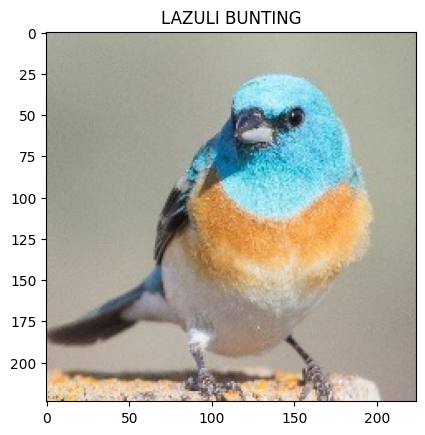

In [137]:
# Escogiendo y mostrando una imagen al azar del conjunto de test
idx = np.random.randint(1, 6)
bird = random.choice(os.listdir('my_dataset/test'))
img = cv2.imread(f'my_dataset/test/{bird}/{idx}.jpg', cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title(bird)

## Creación del dataset para entrenar

In [138]:
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 128
train_dataset = image_dataset_from_directory(
 "my_dataset/train",
    image_size=(224, 224),
    batch_size=batch_size)
test_dataset = image_dataset_from_directory(
   "my_dataset/test",
    image_size=(224, 224),
    batch_size=batch_size)
valid_dataset = image_dataset_from_directory(
   "my_dataset/valid",
    image_size=(224, 224),
    batch_size=batch_size)

print(f"Total dataset number of samples = {len(train_dataset)*batch_size + len(valid_dataset)*batch_size + len(test_dataset)*batch_size}")

Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Total dataset number of samples = 90112


Hay unas 90.000 muestras pertenecientes a 525 clases distintas.

## Análisis del balance de clases

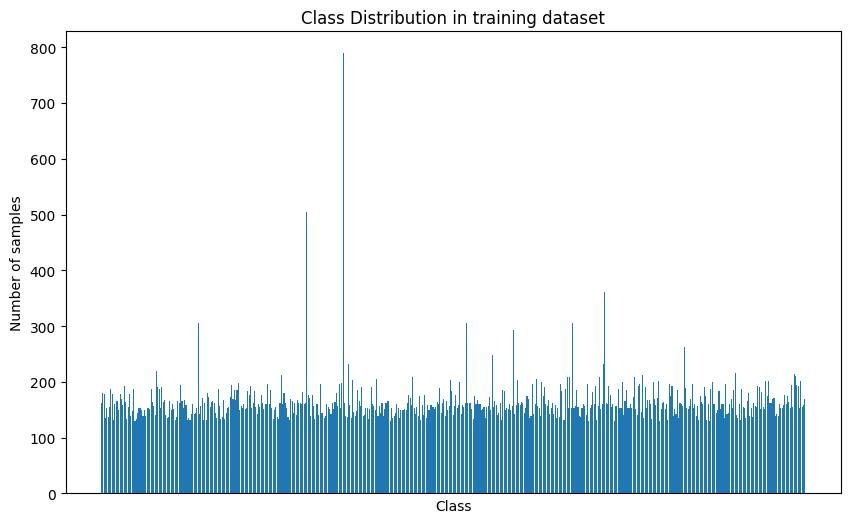

In [139]:
dataset_path = 'my_dataset/train'

# Get class names
class_names = train_dataset.class_names

# Count the number of samples in each class
class_counts = {class_name: 0 for class_name in class_names}
for root, dirs, files in os.walk(dataset_path):
    for class_name in class_names:
        if class_name in root:
            class_counts[class_name] += len(files)
# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of samples')
plt.title('Class Distribution in training dataset')
plt.xticks([])
plt.show()

Se puede observar que, salvo unas 10 clases que están mayormente representadas, todas las clases tienen al rededor de 200 muestras.

## Se muestran las clases mayormente representadas

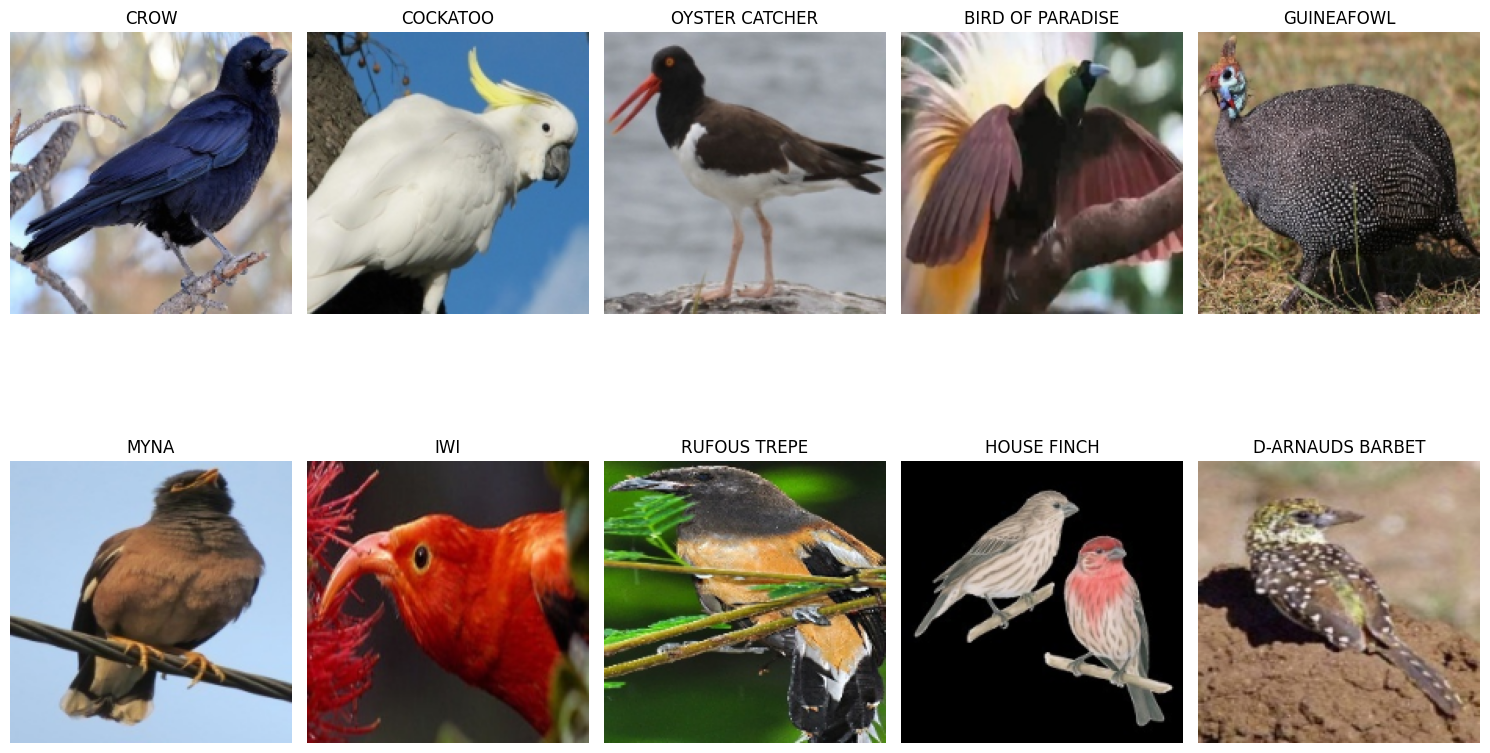

In [140]:
# Sort the classes based on the number of samples and select the top N
sorted_classes = sorted(class_counts.items(), key=lambda item: item[1], reverse=True)
top_classes = sorted_classes[:10]
plt.figure(figsize=(15, 10))

for i, (class_name, _) in enumerate(top_classes, 1):
    class_dir = os.path.join(dataset_path, class_name)
    random_image_file = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, random_image_file)

    # Use OpenCV to read and resize the image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (180, 180))

    # Convert BGR image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Acondicionamiento de los datos

*   Para el acondicionamiento de los datos se va a realizar un diezmado de la resolución de la imagen para reducir el número de operaciones en la convolución.
*   Se mantendrán los tres canales de la imagen, puesto que el color del ave es discriminativo en cuanto a la clasificación de la especie y facilitará el aprendizaje de la red.

Se visualiza un ejemplo del resultado del acondicionamiento de los datos

Text(0.5, 1.0, 'LAZULI BUNTING')

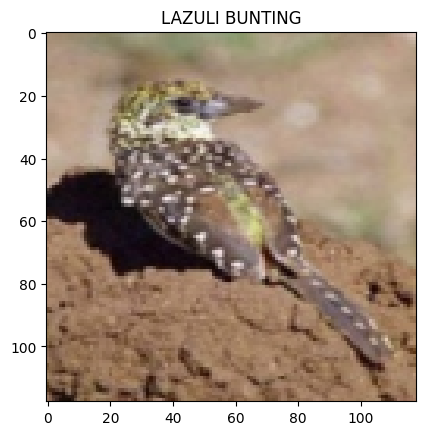

In [141]:
data_conditioning = keras.Sequential(
    [
        layers.Resizing(118,118),
        layers.Rescaling(1./255),
    ]
)
conditioned_img = data_conditioning(img)
plt.imshow(conditioned_img)
plt.title(bird)

# Implementación y entrenamiento de una CNN *from scratch*
Se realiza un entrenamiento de una red preliminar para ver cómo se comporta con el conjunto de datos.
Cabe resaltar que:
* Pese a que no se ha realizado una búsqueda exhaustiva de los mejores hiperparámetros. A lo largo de toda la experimentación, los mejores hiperparámetros que se han encontrado para el entrenamiento de la cnn son *batch size* = 128 y *learning rate* = 0.001

In [142]:
import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))

x = layers.Resizing(118,118)(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_46 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resizing_18 (Resizing)      (None, 118, 118, 3)       0         
                                                                 
 rescaling_20 (Rescaling)    (None, 118, 118, 3)       0         
                                                                 
 batch_normalization_60 (Ba  (None, 118, 118, 3)       12        
 tchNormalization)                                               
                                                                 
 conv2d_60 (Conv2D)          (None, 116, 116, 32)      896       
                                                                 
 max_pooling2d_60 (MaxPooli  (None, 58, 58, 32)        0         
 ng2D)                                                    

In [143]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{BASE_FOLDER}/checkpoints/CNN/best_small_model.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                                  mode='max',
                                  monitor="val_accuracy")]

In [144]:
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/20
662/662 [==============================] - 71s 97ms/step - loss: 3.4781 - accuracy: 0.0043 - val_loss: 1.7812 - val_accuracy: 0.0062
Epoch 2/20
662/662 [==============================] - 62s 87ms/step - loss: 1.4417 - accuracy: 0.0070 - val_loss: 1.2633 - val_accuracy: 0.0071
Epoch 3/20
662/662 [==============================] - 57s 84ms/step - loss: 0.6855 - accuracy: 0.0083 - val_loss: 1.2833 - val_accuracy: 0.0074
Epoch 4/20
662/662 [==============================] - 58s 85ms/step - loss: 0.3332 - accuracy: 0.0090 - val_loss: 1.4166 - val_accuracy: 0.0073
Epoch 5/20
662/662 [==============================] - 51s 76ms/step - loss: 0.2608 - accuracy: 0.0091 - val_loss: 1.5132 - val_accuracy: 0.0073
Epoch 6/20
662/662 [==============================] - 53s 79ms/step - loss: 0.2426 - accuracy: 0.0091 - val_loss: 1.4972 - val_accuracy: 0.0074
Epoch 7/20
662/662 [==============================] - 52s 78ms/step - loss: 0.2191 - accuracy: 0.0092 - val_loss: 1.5429 - val_accuracy:

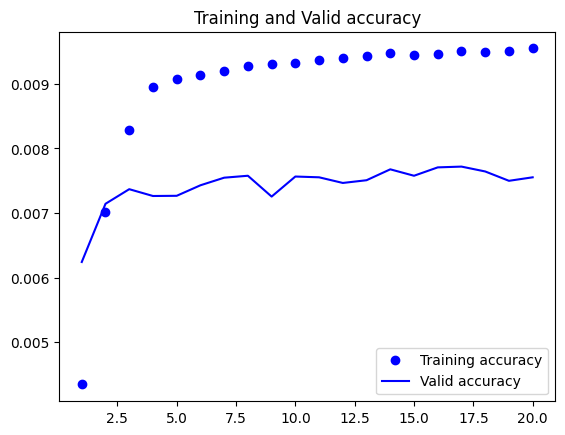

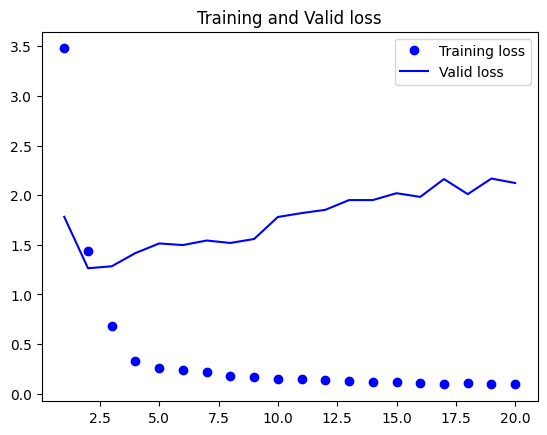

In [145]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

En vista de que la red no es capaz de converger. Aumentaremos el número de parámetros de la siguiente forma:
* Añadiendo capas convolucionales
* Extendiendo el número de mapas de características a la salida de la red convolucional
* Eliminando el *global max pooling* a la salida de la red y sustituyendolo por una capa *flatten* para tener en cuenta todas sus activaciones, además de la información posicional.

In [146]:
import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))

x = layers.Resizing(118,118)(inputs)
x = layers.Rescaling(1./255)(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu",padding="same")(x)

x = layers.Flatten()(x)

x = layers.Dropout(0.1)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_47 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resizing_19 (Resizing)      (None, 118, 118, 3)       0         
                                                                 
 rescaling_21 (Rescaling)    (None, 118, 118, 3)       0         
                                                                 
 batch_normalization_66 (Ba  (None, 118, 118, 3)       12        
 tchNormalization)                                               
                                                                 
 conv2d_66 (Conv2D)          (None, 116, 116, 32)      896       
                                                                 
 max_pooling2d_66 (MaxPooli  (None, 58, 58, 32)        0         
 ng2D)                                                    

In [147]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{BASE_FOLDER}/checkpoints/CNN/best_base_model.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                                  mode='max',
                                  monitor="val_accuracy")]

In [148]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/100
662/662 [==============================] - 69s 95ms/step - loss: 3.5311 - accuracy: 0.2990 - val_loss: 2.0633 - val_accuracy: 0.5189
Epoch 2/100
662/662 [==============================] - 61s 92ms/step - loss: 1.6084 - accuracy: 0.6183 - val_loss: 1.4595 - val_accuracy: 0.6476
Epoch 3/100
662/662 [==============================] - 62s 94ms/step - loss: 0.8031 - accuracy: 0.7869 - val_loss: 1.4029 - val_accuracy: 0.6922
Epoch 4/100
662/662 [==============================] - 62s 92ms/step - loss: 0.4206 - accuracy: 0.8787 - val_loss: 1.5008 - val_accuracy: 0.7048
Epoch 5/100
662/662 [==============================] - 61s 92ms/step - loss: 0.2966 - accuracy: 0.9136 - val_loss: 1.5665 - val_accuracy: 0.7219
Epoch 6/100
662/662 [==============================] - 61s 92ms/step - loss: 0.2606 - accuracy: 0.9234 - val_loss: 1.6723 - val_accuracy: 0.6960
Epoch 7/100
662/662 [==============================] - 61s 91ms/step - loss: 0.2147 - accuracy: 0.9375 - val_loss: 1.7867 - val_ac

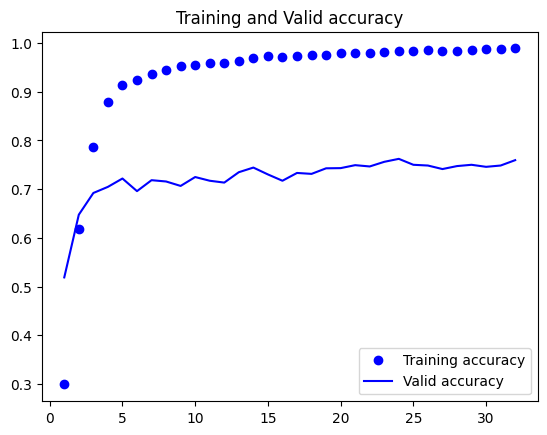

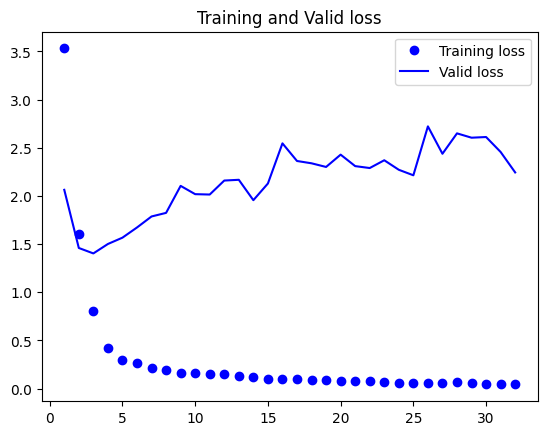

In [149]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

Se observa que una red con mayor número de parámetros se sobreajusta demasiado al conjunto de entrenamiento pero no es capaz de generaliar para los conjuntos de validación y test. Tras experimentar aumentando y disminuyendo la complejidad de la red, no se ha encontrado un equilibrio entre el underfitting y el overfitting. Por ello se recurre al data augmentation para generar más variedad en el conjunto de entrenamiento.
Se visualiza un ejemplo del aumento de los datos:

Text(0.5, 1.0, 'LAZULI BUNTING')

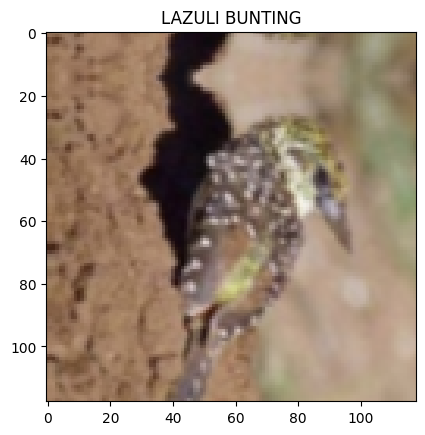

In [150]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomTranslation(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2))
    ]
)
augmented_img = data_augmentation(conditioned_img)
plt.imshow(augmented_img)
plt.title(bird)

Se integran las capas de data augmentation directamente a la entrada de la red, tras el acondicionamiento. De esta forma, se realiza de forma iterativa cada vez que se le pasa una muestra de entrenamiento a la red, generando una aumentación diferente de cada muestra en cada época. Este método da lugar a más aleatoriedad que generar las aumentaciones del conjunto de datos antes del entrenamiento.

In [151]:
import keras
from keras import layers
inputs = keras.Input(shape=(224, 224, 3))

x = layers.Resizing(118,118)(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.RandomFlip("horizontal")(x)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomTranslation(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2))(x)


x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu",padding="same")(x)
x = layers.MaxPooling2D(pool_size=2, padding="valid")(x)

x = layers.BatchNormalization()(x)
x = layers.Conv2D(filters=1024, kernel_size=3, activation="relu",padding="same")(x)

x = layers.Flatten()(x)

x = layers.Dropout(0.1)(x)
outputs = layers.Dense(525, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_48 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 resizing_20 (Resizing)      (None, 118, 118, 3)       0         
                                                                 
 rescaling_22 (Rescaling)    (None, 118, 118, 3)       0         
                                                                 
 random_flip_25 (RandomFlip  (None, 118, 118, 3)       0         
 )                                                               
                                                                 
 random_rotation_25 (Random  (None, 118, 118, 3)       0         
 Rotation)                                                       
                                                                 
 random_translation_17 (Ran  (None, 118, 118, 3)       0  

In [152]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [153]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath=f"{BASE_FOLDER}/checkpoints/CNN/best_model_data_augmentation.keras",
        save_best_only=True,
        monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                                  mode='max',
                                  monitor="val_accuracy")]

In [154]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=valid_dataset,
    callbacks=callbacks)

Epoch 1/100
662/662 [==============================] - 70s 97ms/step - loss: 4.8451 - accuracy: 0.0903 - val_loss: 4.3494 - val_accuracy: 0.1749
Epoch 2/100
662/662 [==============================] - 65s 97ms/step - loss: 3.4488 - accuracy: 0.2503 - val_loss: 3.4429 - val_accuracy: 0.3032
Epoch 3/100
662/662 [==============================] - 65s 98ms/step - loss: 2.7874 - accuracy: 0.3656 - val_loss: 2.6304 - val_accuracy: 0.4202
Epoch 4/100
662/662 [==============================] - 65s 97ms/step - loss: 2.3459 - accuracy: 0.4497 - val_loss: 2.0429 - val_accuracy: 0.5349
Epoch 5/100
662/662 [==============================] - 64s 97ms/step - loss: 2.0422 - accuracy: 0.5116 - val_loss: 1.5820 - val_accuracy: 0.6107
Epoch 6/100
662/662 [==============================] - 64s 96ms/step - loss: 1.8175 - accuracy: 0.5588 - val_loss: 1.4926 - val_accuracy: 0.6362
Epoch 7/100
662/662 [==============================] - 64s 96ms/step - loss: 1.6392 - accuracy: 0.5937 - val_loss: 1.5702 - val_ac

Mostrar curva de entrenamiento

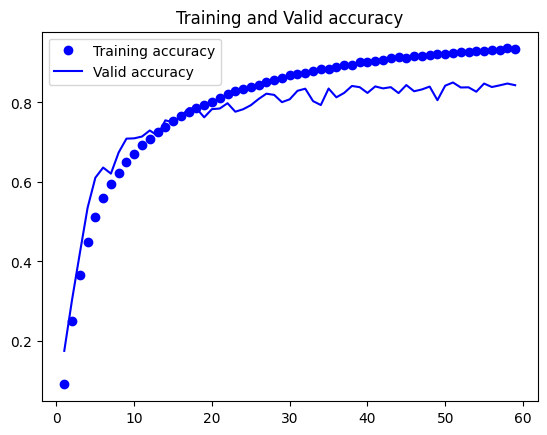

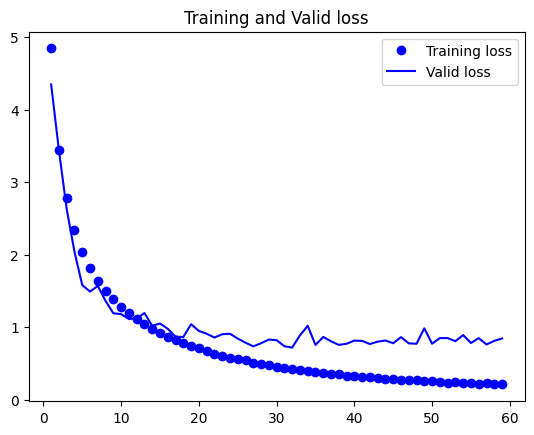

In [155]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

Cargar el modelo para evaluar en test

In [156]:
test_model = keras.models.load_model(f"{BASE_FOLDER}/checkpoints/CNN/best_model_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

21/21 [==============================] - 2s 46ms/step - loss: 0.6899 - accuracy: 0.8735
Test accuracy: 0.874


Se va a realizar un estudio de la confusión en el conjunto de test visualizando la matriz de confusión.

# VGG-19

In [157]:
# setting image size
IMAGE_SIZE = [ 224 , 224 , 3 ]

# Load the model
vgg = VGG19( include_top = False,
            input_shape = IMAGE_SIZE,classes=525,
            weights = 'imagenet')

# Flattened the last layer
x = layers.Flatten()(vgg.output)

# Created a new layer as output
prediction = layers.Dense( 525 , activation = 'softmax' )(x)

# Join it with the model
model = keras.Model( inputs = vgg.input , outputs = prediction )

# Congelar todas las capas de la red VGG19
for  layer in vgg.layers:
    layer.trainable = False

# Visualize the model again
model.summary()

Model: "model_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_49 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [158]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# compining the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
                                    f"{BASE_FOLDER}/checkpoints/VGG/vgg_data_augment.keras",
                                    save_best_only=True,
                                    monitor="val_accuracy"),
    keras.callbacks.EarlyStopping(patience=8,
                              mode='max',
                              monitor="val_accuracy")]

In [159]:
history = model.fit(train_dataset,
                          validation_data = valid_dataset,
                          epochs = 100,
                          callbacks = callbacks)

Epoch 1/100


ResourceExhaustedError: Graph execution error:

Detected at node model_31/block1_conv2/Relu defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 377, in dispatch_queue

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 250, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 748, in __init__

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-159-7fc170bd5e22>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 590, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 515, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/activations.py", line 306, in relu

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5395, in relu

OOM when allocating tensor with shape[128,64,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node model_31/block1_conv2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_747541]

In [ ]:
accuracy = 100*np.array(history.history["accuracy"])
val_accuracy = 100*np.array(history.history["val_accuracy"])
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

In [ ]:
# setting image size
IMAGE_SIZE = [ 224 , 224 , 3 ]

# Load the model
vgg = VGG19( include_top = False,
            input_shape = IMAGE_SIZE,classes=525,
            weights = 'imagenet')

# Data augmentation
inputs = keras.Input(shape=IMAGE_SIZE)

x = layers.RandomFlip("horizontal")(inputs)
x = layers.RandomRotation(0.2)(x)
x = layers.RandomTranslation(height_factor=(-0.2,0.2),width_factor=(-0.2,0.2))(x)

# Vgg feature extraction
x = vgg(x)

# Flattened the last layer
x = layers.Flatten()(x)

# Dropout
x = layers.Dropout(rate=0.3)(x)

# Created a new layer as output
prediction = layers.Dense( 525 , activation = 'softmax' )(x)

# Join it with the model
model = keras.Model( inputs = inputs , outputs = prediction )

# Congelar todas las capas de la red VGG19
for  layer in vgg.layers:
    layer.trainable = False

# Visualize the model again
model.summary()

Se reduce el tamaño del batch por limitación de memoria

In [ ]:
batch_size = 64
train_dataset = image_dataset_from_directory(
 "my_dataset/train",
    image_size=(224, 224),
    batch_size=batch_size)
test_dataset = image_dataset_from_directory(
   "my_dataset/test",
    image_size=(224, 224),
    batch_size=batch_size)
valid_dataset = image_dataset_from_directory(
   "my_dataset/valid",
    image_size=(224, 224),
    batch_size=batch_size)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
# compining the model
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = optimizer,
              metrics = ['accuracy'])
callbacks = [
        keras.callbacks.ModelCheckpoint(
                                        f"{BASE_FOLDER}/checkpoints/VGG/vgg_data_augment.keras",
                                        save_best_only=True,
                                        monitor="val_accuracy"),
        keras.callbacks.EarlyStopping(patience=8,
                                      monitor='val_accuracy',
                                      mode='max')]

In [ ]:
history = model.fit(train_dataset,
                          validation_data = valid_dataset,
                          epochs = 100,
                          callbacks = callbacks)

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Valid accuracy")
plt.title("Training and Valid accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Valid loss")
plt.title("Training and Valid loss")
plt.legend()
plt.show()

# ResNet-50

In [ ]:
# Load the ResNet50 model, pre-trained on ImageNet
base_model = keras.applications.ResNet50(weights='imagenet', include_top=False)

# Add new layers on top of ResNet50
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(525, activation='softmax')(x)

model = keras.models.Model(inputs=base_model.input, outputs=predictions)

# Freeze the original layers of ResNet50
for layer in base_model.layers:
    layer.trainable = False


## Ejemplo de generación de documento PDF a partir del Colab Notebook (fichero ".ipynb")

In [ ]:
# Ejecutando los siguientes comandos en la última celda del Colab Notebook se convierte de ".ipynb" a PDF
# En caso de querer ocultar la salida de una celda puesto que no tenga relevancia se debe insertar
# el comando %%capture al inicio de la misma. Véase la celda que contiene !ls test en este Notebook.

In [ ]:
%%capture
name_IPYNB_file = '07MIAR_Proyecto_Programacion.ipynb'
get_ipython().system(
        "apt update >> /dev/null && apt install texlive-xetex texlive-fonts-recommended texlive-generic-recommended >> /dev/null"
    )
get_ipython().system(
            "jupyter nbconvert --output-dir='$BASE_FOLDER' '$BASE_FOLDER''$name_IPYNB_file' --to pdf"
        )